In [58]:
'''
Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
'''

'\nConsider only the below columns and prepare a prediction model for predicting Price.\nCorolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]\n'

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [60]:
#Import Dataset

In [61]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

07/26/2023  05:08 PM    <DIR>          .
04/05/2023  08:48 PM    <DIR>          ..
07/26/2023  03:12 PM    <DIR>          .ipynb_checkpoints
07/26/2023  03:06 PM           783,026 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
04/15/2023  10:24 PM    <DIR>          Clustering
07/19/2023  10:58 PM               218 delivery_time (1).csv
07/25/2023  09:29 PM           169,021 Delivery_time-SLR.ipynb
04/13/2023  03:16 PM    <DIR>          Hypothesis Testing
04/14/2023  10:57 PM    <DIR>          Logistic-Regression
07/25/2023  10:31 PM    <DIR>          Multi-Linear-Regression
07/19/2023  10:58 PM               454 Salary_Data (1).csv
07/25/2023  09:29 PM           214,188 Salary_hike-SLR.ipynb
04/14/2023  12:40 PM    <DIR>

In [62]:
data=pd.read_csv(r'C:\Users\hp\Documents\EXCELR\DS_Assign_Ans\ToyotaCorolla.csv', encoding= 'unicode_escape')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [63]:
data1= data.iloc[:,[2,3,6,8,12,13,15,16,17]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### EDA

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [65]:
#Missing Data

In [66]:
data1.isnull()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False


In [67]:
data1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

<AxesSubplot:>

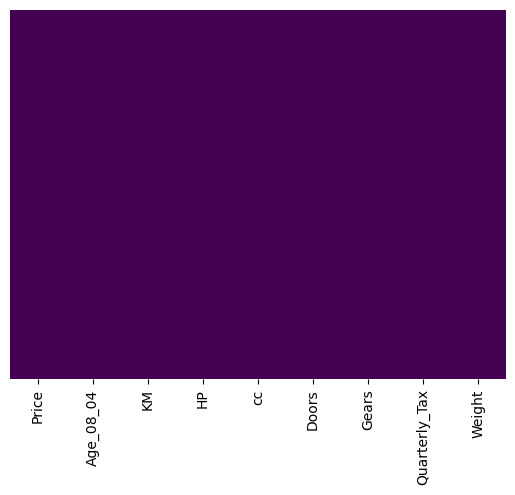

In [68]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
# Checking for duplicate values
data1[data1.duplicated()] 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [70]:
# Dropping duplicate values
data1 = data1.drop_duplicates().reset_index(drop=True)
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [71]:
# Renaming
data1 = data1.rename({'Age_08_04':'Age'}, axis = 1)
data1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [72]:
data1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [73]:
data1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [74]:
#Ploting

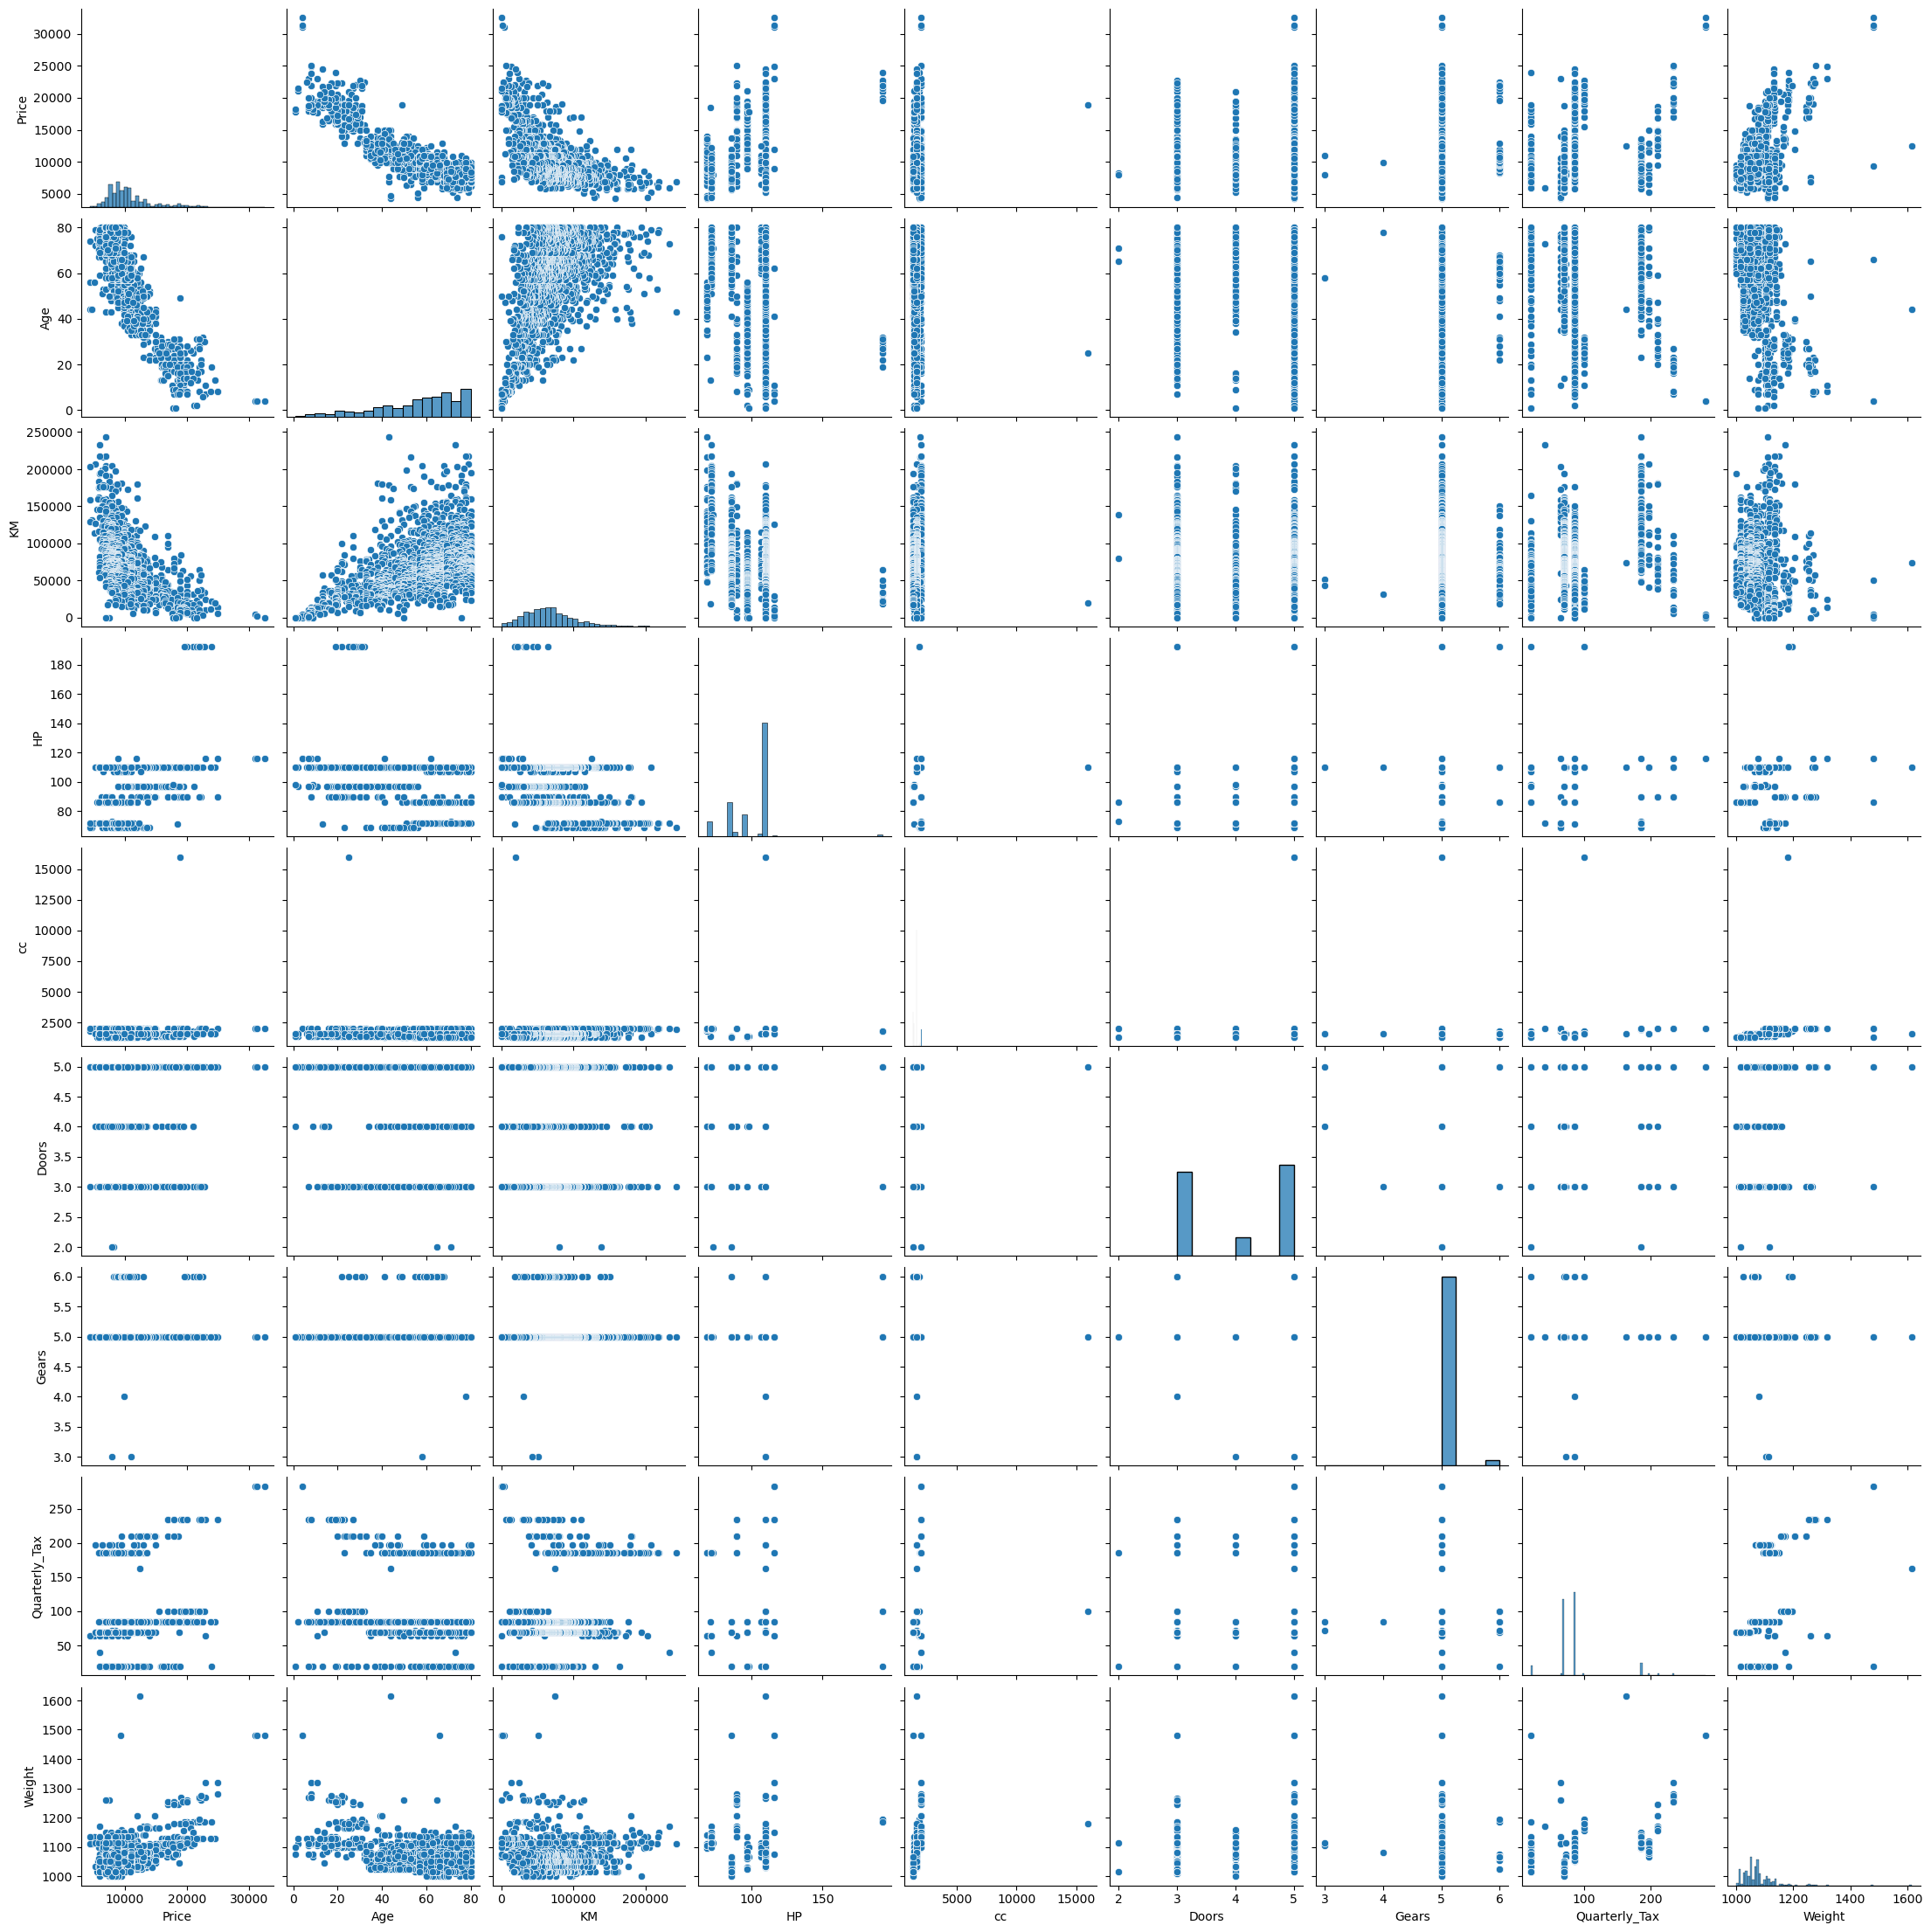

In [75]:
sns.pairplot(data1)

### Building a Model

In [76]:
import statsmodels.formula.api as smf
model= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:11:10   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [78]:
model.rsquared, model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [79]:
#cc and Doors are insignificant

In [80]:
# Building SLR and MLR models for insignificant variables 

In [82]:
SLR_cc=smf.ols('Price~cc',data=data1).fit()
SLR_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.29e-06
Time:                        17:19:02   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
SLR_Doors=smf.ols('Price~Doors',data=data1).fit()
SLR_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.40e-12
Time:                        17:19:34   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
MLR_CD = smf.ols('Price~cc+ Doors', data=data1).fit()
MLR_CD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.55e-15
Time:                        17:20:26   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Validation

In [85]:
#Collinearty check

In [86]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_WT=1/(1-rsq_WT)

rsq_Gears=smf.ols('Gears~Age+KM+HP+cc+Doors+Weight+Quarterly_Tax',data=data1).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age+KM+HP+cc+Doors+Gears+Weight',data=data1).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_DR,vif_Gears,vif_Quarterly_Tax,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


In [87]:
#Residual analysis

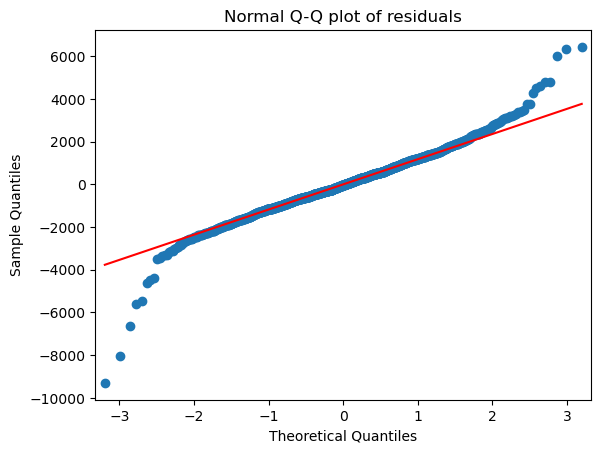

In [88]:
# Q-Q Plot using residual model
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [89]:
#Test for Homoscedasticity or Heteroscedasticity

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

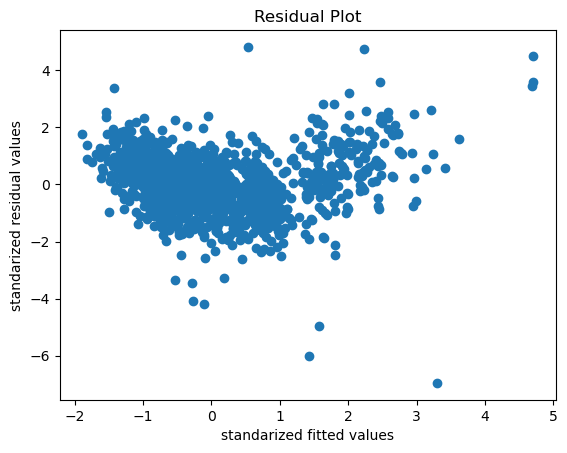

In [90]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()


In [91]:
#Residuals Vs Regressors

eval_env: 1


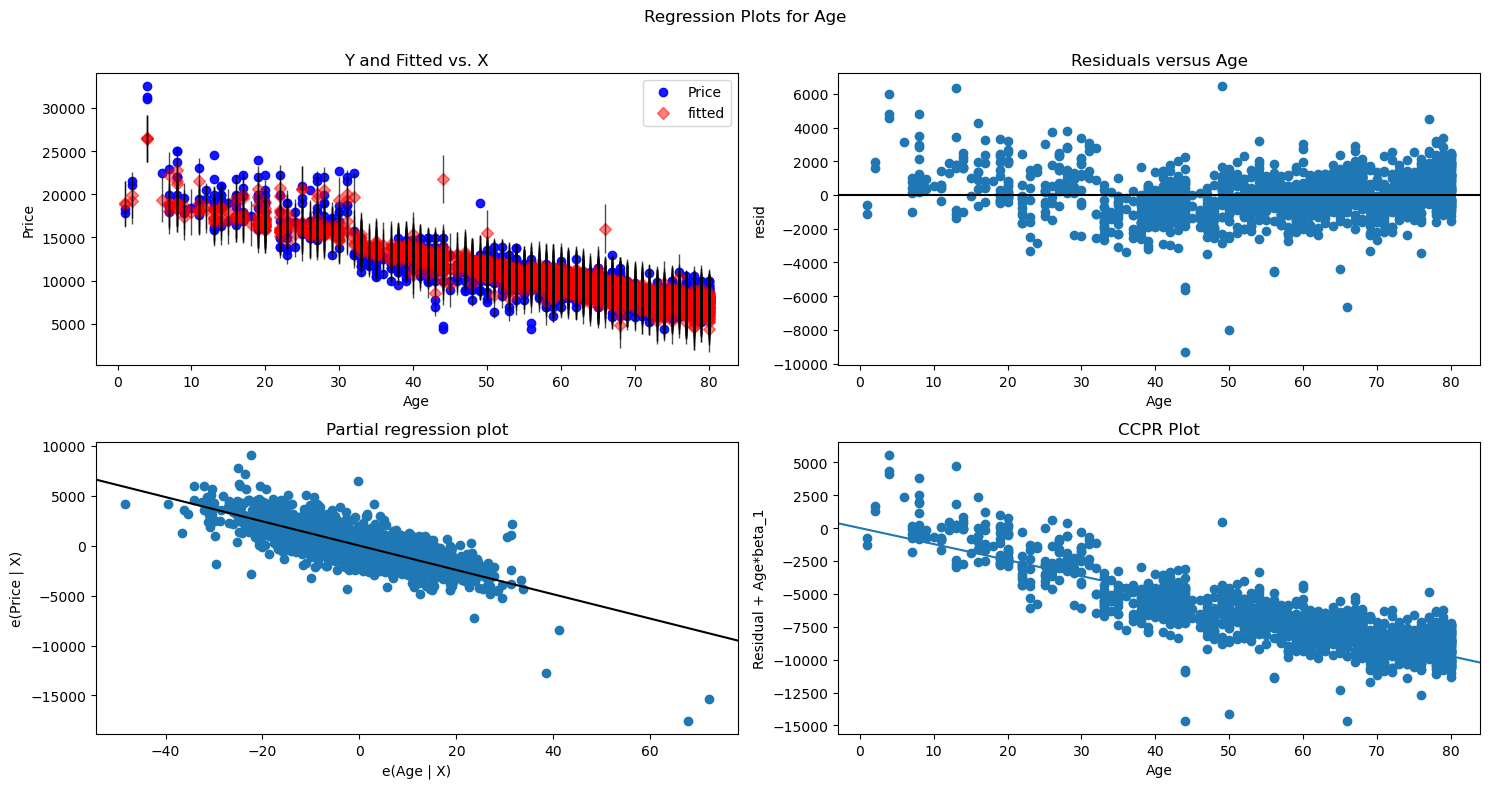

In [92]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


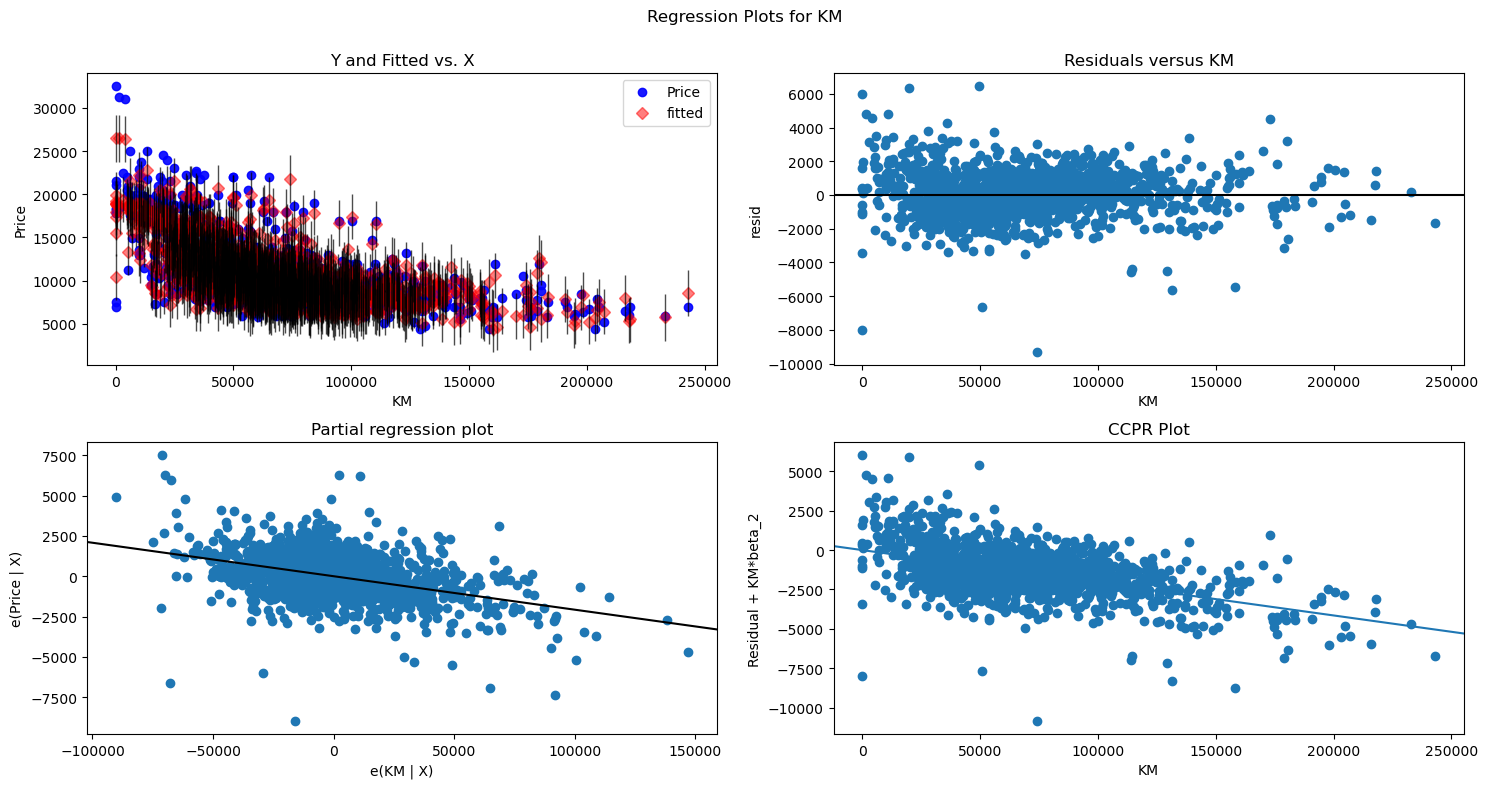

In [93]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


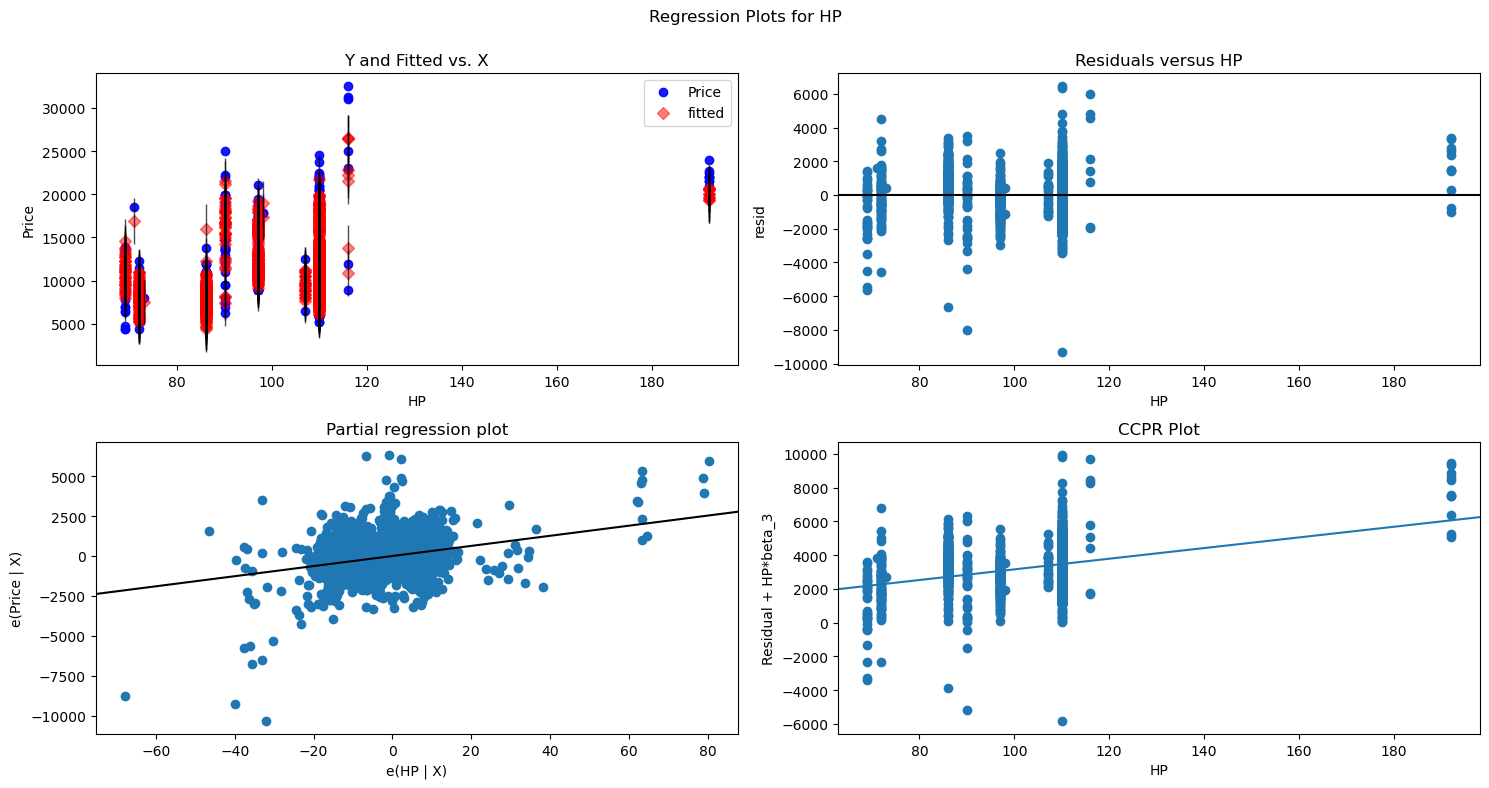

In [94]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


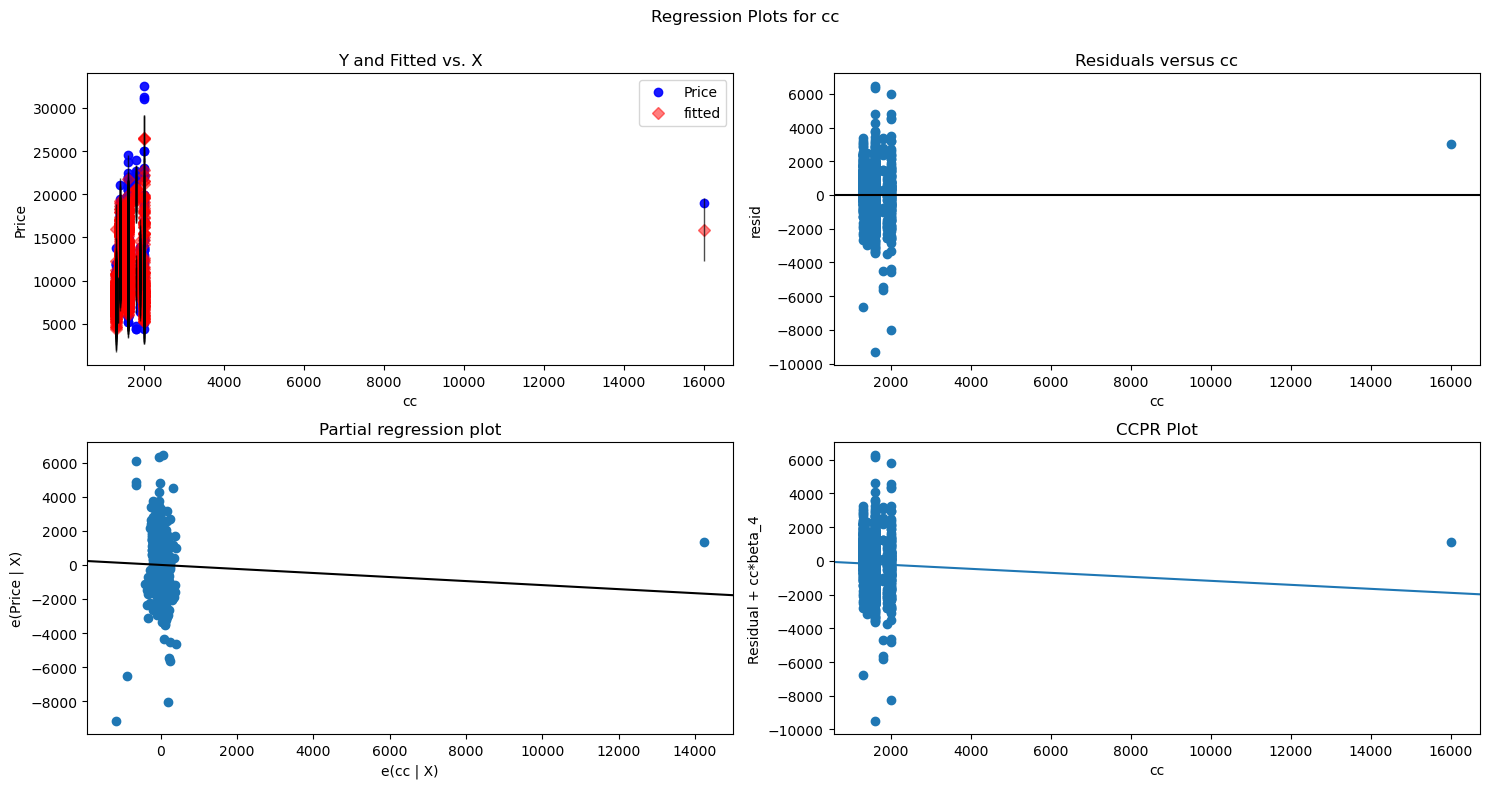

In [95]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


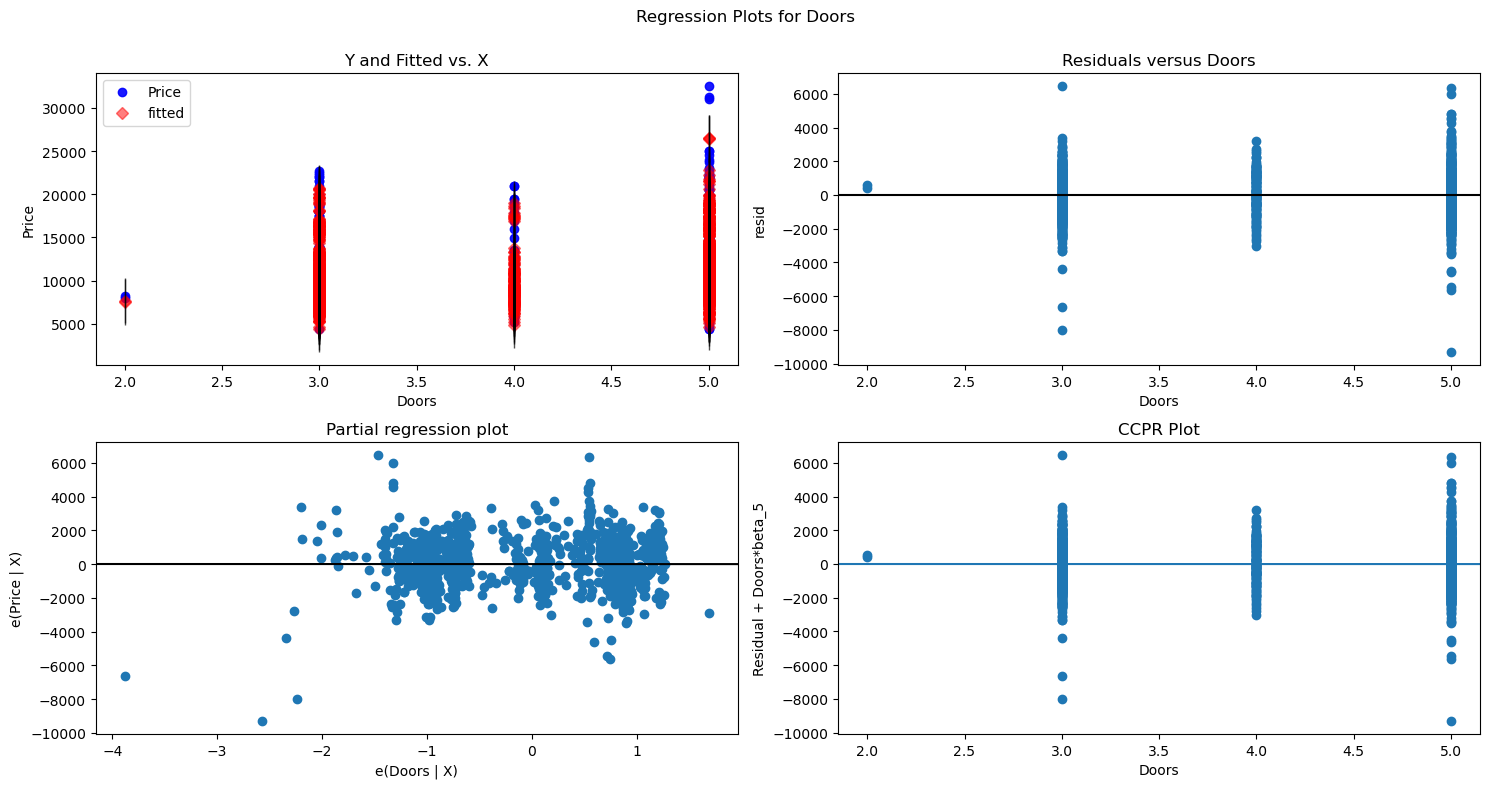

In [96]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


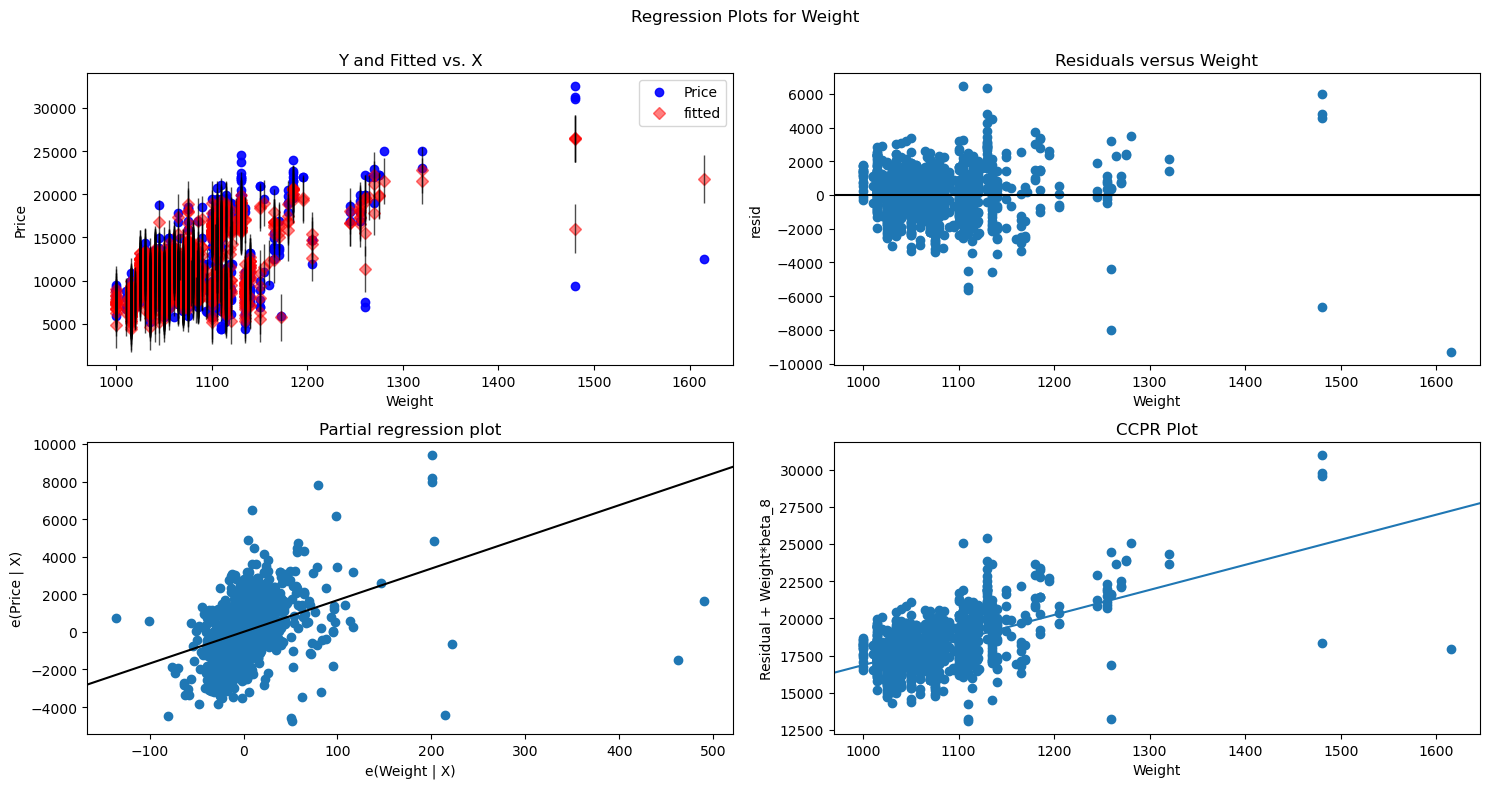

In [97]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

eval_env: 1


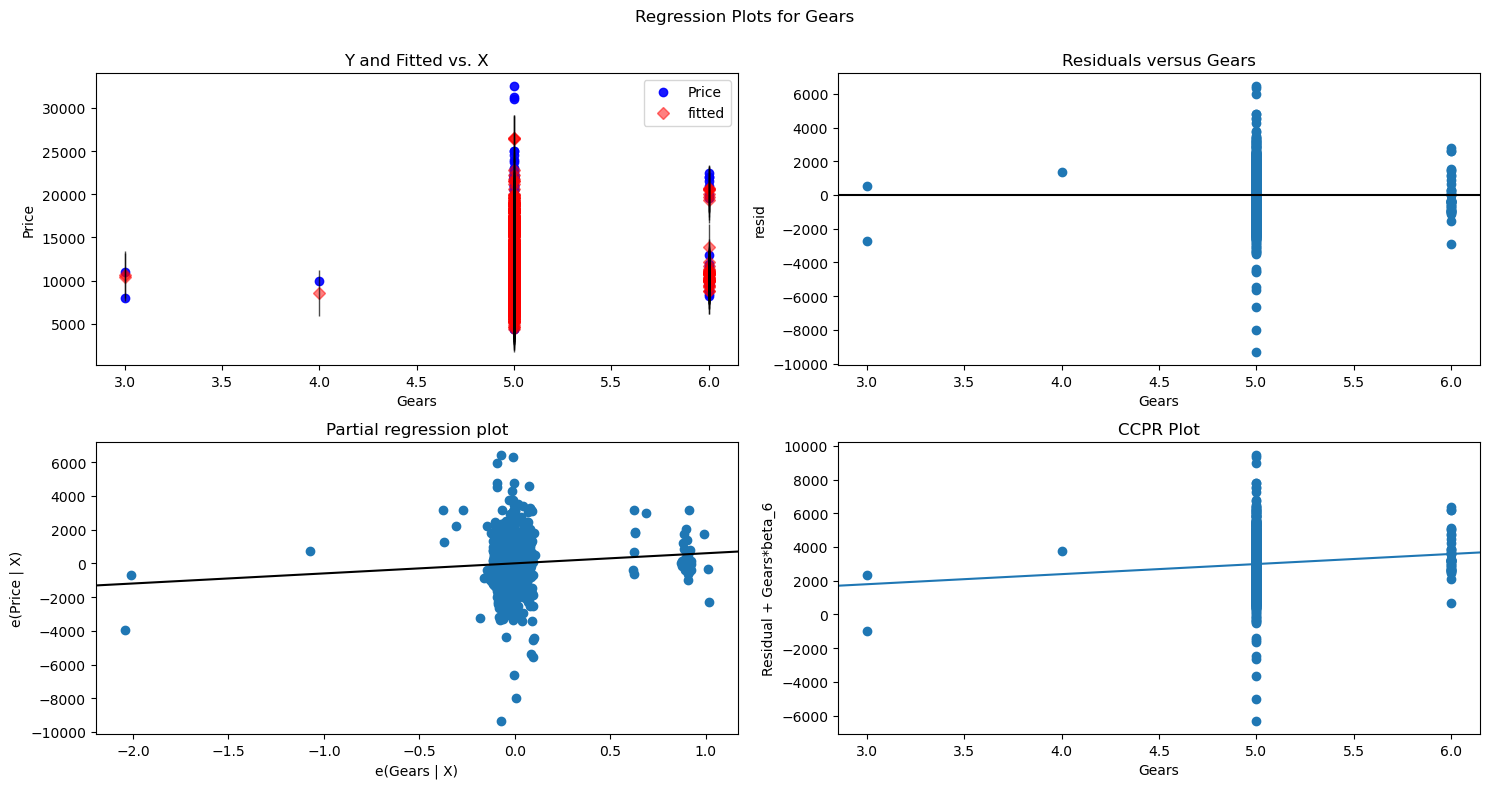

In [98]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


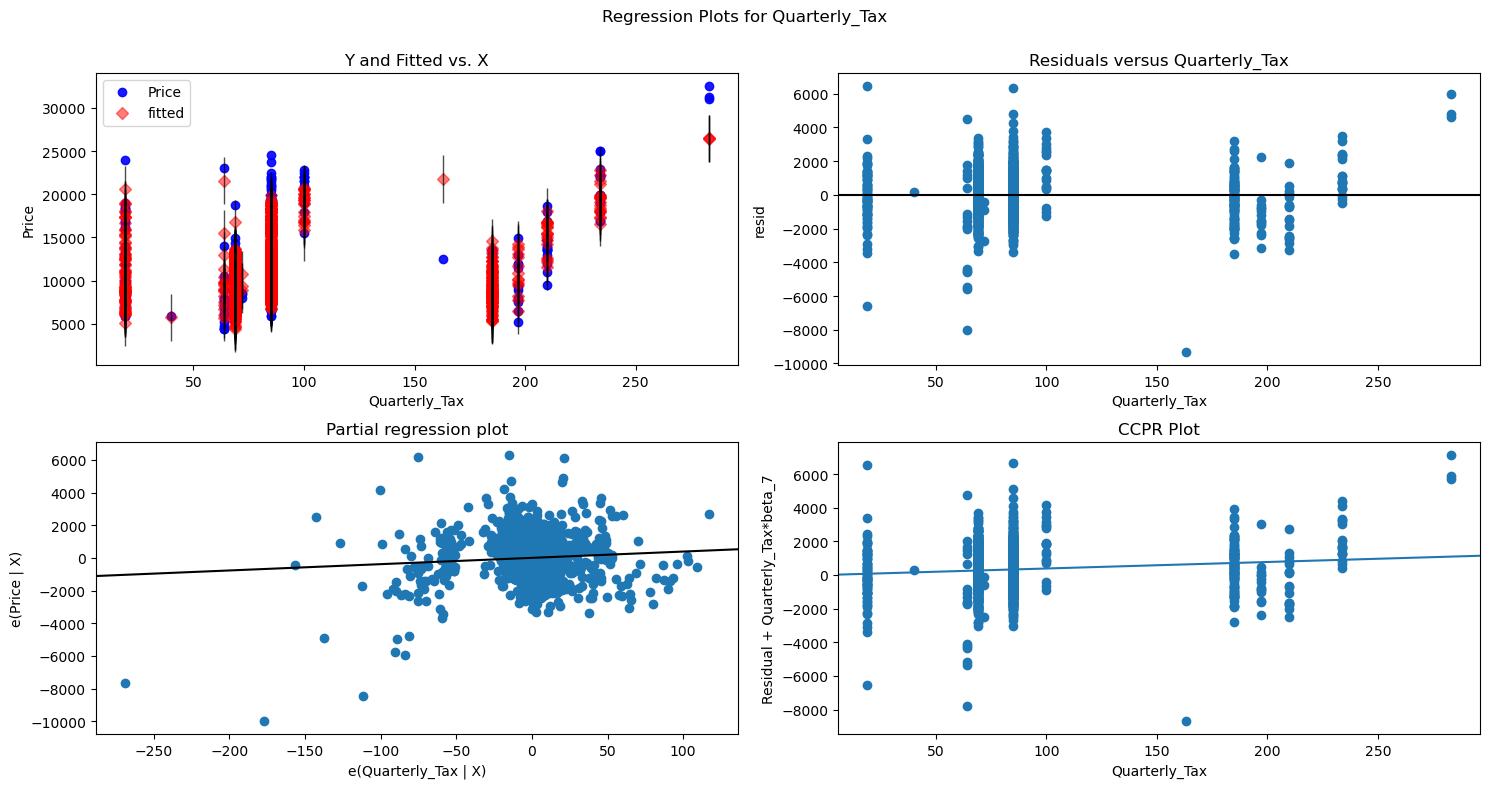

In [99]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

In [100]:
#Detecting Outliers
#Cook's Distance

In [101]:
(c, _)= model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

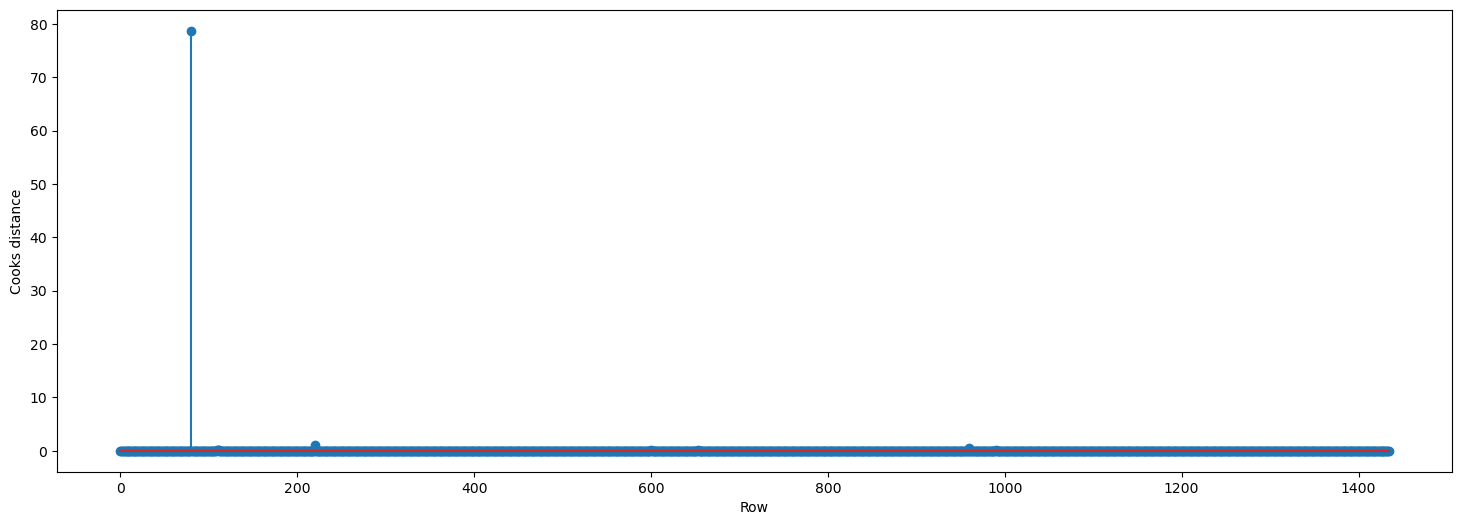

In [103]:
fig = plt.subplots(figsize=(18, 6))
plt.stem(np.arange(len(data1)), np.round(c,3))
plt.xlabel('Row')
plt.ylabel('Cooks distance')
plt.show()
     

In [104]:
(np.argmax(c),np.max(c))

(80, 78.7295058224851)

In [105]:
#Model for improvement 

In [106]:
model1= smf.ols("Price~np.sqrt(Age)+np.sqrt(KM)+np.sqrt(HP)+np.sqrt(cc)+np.sqrt(Doors)+np.sqrt(Gears)+np.sqrt(Quarterly_Tax)+np.sqrt(Weight)",data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1253.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:38:40   Log-Likelihood:                -12295.
No. Observations:                1435   AIC:                         2.461e+04
Df Residuals:                    1426   BIC:                         2.466e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.066e+04   2719.061     -7.598      0.000    -2.6e+04   -1.53e+04
np.sqrt(Age)           -1624.7959     35.165    -46.205      0.000   -1693.776   -1555.816
np.sqrt(KM)               -9.1338      0.649    -14.075      0.000     -10.407      -7.861
np.sqrt(HP)              722.4745     53.182     13.585      0.000     618.151     826.798
np.sqrt(cc)              -41.5247     12.620     -3.290      0.001     -66.280     -16.770
np.sqrt(Doors)           -39.3648    151.091     -0.261      0.794    -335.749     257.019
np.sqrt(Gears)          3165.1931    844.846      3.746      0.000    1507.919    4822.467
np.sqrt(Quarterly_Tax)   116.8149     23.680      4.933      0.000      70.364     163.266
np.sqrt(Weight)          974.6077     68.561     14.215      0.000     840.117    1109.098
==============================================================================
Omnibus:                      123.481   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.207
Skew:                          -0.131   Prob(JB):                    1.09e-151
Kurtosis:                       6.400   Cond. No.                     2.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
model2= smf.ols("np.log(Price)~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1015.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:42:57   Log-Likelihood:                 1078.1
No. Observations:                1435   AIC:                            -2138.
Df Residuals:                    1426   BIC:                            -2091.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.5191      0.121     70.691      0.000       8.283       8.756
Age              -0.0103      0.000    -46.216      0.000      -0.011      -0.010
KM            -2.029e-06   1.07e-07    -18.981      0.000   -2.24e-06   -1.82e-06
HP                0.0026      0.000     10.823      0.000       0.002       0.003
cc            -3.848e-06   7.69e-06     -0.501      0.617   -1.89e-05    1.12e-05
Doors             0.0107      0.003      3.124      0.002       0.004       0.017
Gears             0.0685      0.017      4.074      0.000       0.036       0.101
Quarterly_Tax     0.0006      0.000      5.523      0.000       0.000       0.001
Weight            0.0007   9.13e-05      7.473      0.000       0.001       0.001
==============================================================================
Omnibus:                      226.001   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              943.845
Skew:                          -0.696   Prob(JB):                    1.11e-205
Kurtosis:                       6.721   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
model3= smf.ols("np.sqrt(Price)~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= data1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(Price)   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1146.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:43:21   Log-Likelihood:                -4578.9
No. Observations:                1435   AIC:                             9176.
Df Residuals:                    1426   BIC:                             9223.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.4058      6.210      7.634      0.000      35.224      59.588
Age              -0.5575      0.011    -48.484      0.000      -0.580      -0.535
KM               -0.0001   5.51e-06    -18.244      0.000      -0.000   -8.97e-05
HP                0.1401      0.012     11.310      0.000       0.116       0.164
cc               -0.0003      0.000     -0.867      0.386      -0.001       0.000
Doors             0.2951      0.176      1.678      0.094      -0.050       0.640
Gears             3.2018      0.866      3.696      0.000       1.503       4.901
Quarterly_Tax     0.0245      0.006      4.256      0.000       0.013       0.036
Weight            0.0559      0.005     11.875      0.000       0.047       0.065
==============================================================================
Omnibus:                      140.810   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.959
Skew:                          -0.434   Prob(JB):                    1.11e-111
Kurtosis:                       5.792   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
model4= smf.ols("Price~np.log(Age)+np.log(KM)+np.log(HP)+np.log(cc)+np.log(Doors)+np.log(Gears)+np.log(Quarterly_Tax)+np.log(Weight)",data=data1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     892.3
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:44:44   Log-Likelihood:                -12504.
No. Observations:                1435   AIC:                         2.503e+04
Df Residuals:                    1426   BIC:                         2.507e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.064e+05   8522.631    -12.486      0.000   -1.23e+05   -8.97e+04
np.log(Age)           -5417.8452    116.650    -46.445      0.000   -5646.669   -5189.021
np.log(KM)              146.3679     49.662      2.947      0.003      48.949     243.787
np.log(HP)             4941.4887    288.151     17.149      0.000    4376.243    5506.735
np.log(cc)            -2939.7409    401.326     -7.325      0.000   -3726.994   -2152.488
np.log(Doors)          -226.8286    172.667     -1.314      0.189    -565.538     111.881
np.log(Gears)          2936.7148   1086.493      2.703      0.007     805.418    5068.011
np.log(Quarterly_Tax)   519.1719    109.690      4.733      0.000     304.001     734.343
np.log(Weight)         1.849e+04   1378.207     13.415      0.000    1.58e+04    2.12e+04
==============================================================================
Omnibus:                      344.016   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4955.094
Skew:                          -0.702   Prob(JB):                         0.00
Kurtosis:                      11.995   Cond. No.                     3.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
r2={'Model_Name':['Model','Model1','Model2','Model3','Model4'],'R2':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared]}
r2_table=pd.DataFrame(r2)
r2_table

,Model_Name,R2
0,Model,0.850569
1,Model1,0.875466
2,Model2,0.850569
3,Model3,0.865410
4,Model4,0.833492


In [112]:
model1.rsquared,model1.rsquared_adj

(0.8754655984736137, 0.8747669482546718)